In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#New csv files
sales = pd.read_csv("cleaned_sales_data.csv")
warehouse = pd.read_csv("warehouse_data_named.csv")


In [8]:
# Merge sales and warehouse datasets
combined = pd.merge(sales, warehouse, on="Product_ID", how="inner")

print(combined.shape)
print(combined.head())


(87010, 17)
  Product_Name_x Product_ID Category  Cost_Price  Selling_Price  Units_Sold  \
0  Smartphone X1       P001   Sports         141            225           4   
1  Smartphone X1       P001   Sports         141            225           4   
2  Smartphone X1       P001   Sports         141            225           4   
3  Smartphone X1       P001   Sports         141            225           4   
4  Smartphone X1       P001   Sports         141            225           4   

   Revenue  Profit_Loss_Amount Profit_Loss_Status Warehouse_ID  Stock_On_Hand  \
0      900                 336             Profit          W01            376   
1      900                 336             Profit          W02             74   
2      900                 336             Profit          W03            310   
3      900                 336             Profit          W04            309   
4      900                 336             Profit          W05            315   

   Reorder_Level  Storage_

In [9]:
combined.groupby("Warehouse_ID").agg({
    "Revenue": "sum",
    "Storage_Cost_Per_Unit": "mean"
}).sort_values(by="Revenue", ascending=False)


,Revenue,Storage_Cost_Per_Unit
Warehouse_ID,,
W01,21932835,2.479221
W02,21932835,2.515544
W03,21932835,2.876330
W04,21932835,2.898724
W05,21932835,2.804177


In [10]:
combined.groupby("Warehouse_ID").agg({
    "Profit_Loss_Amount": "sum",
    "Space_Utilization": "mean"
}).sort_values(by="Profit_Loss_Amount", ascending=False)


,Profit_Loss_Amount,Space_Utilization
Warehouse_ID,,
W01,5875355,81.746351
W02,5875355,79.833985
W03,5875355,80.426905
W04,5875355,79.831399
W05,5875355,83.607057


In [11]:
combined["Profit_per_Space"] = combined["Profit_Loss_Amount"] / combined["Space_Utilization"]
combined[["Product_Name_x", "Warehouse_ID", "Profit_per_Space"]].sort_values(by="Profit_per_Space", ascending=False).head(10)

,Product_Name_x,Warehouse_ID,Profit_per_Space
84768,Casual Sneakers,W04,31.850746
62568,Non-stick Frying Pan,W04,30.333333
17108,Non-stick Frying Pan,W04,30.333333
50033,Non-stick Frying Pan,W04,30.333333
82823,Non-stick Frying Pan,W04,30.333333
84765,Casual Sneakers,W01,30.056338
26973,Casual Sneakers,W04,28.955224
66487,Jump Rope,W03,28.741935
38368,Ceramic Dinner Set,W04,27.950820
26970,Casual Sneakers,W01,27.323944


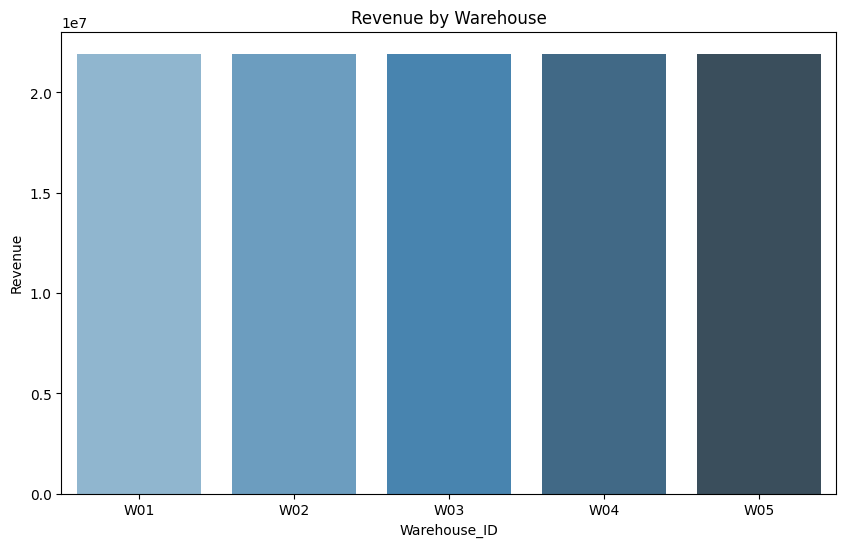

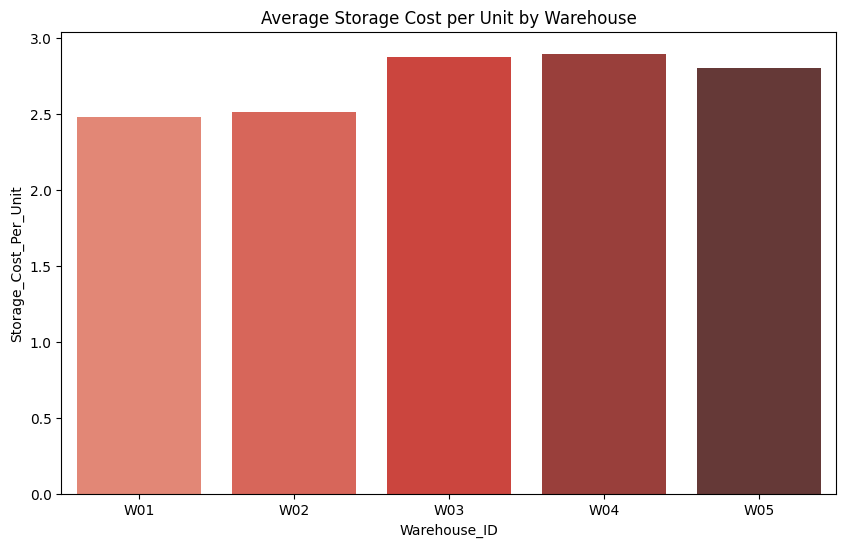

In [12]:


warehouse_perf = combined.groupby("Warehouse_ID").agg({
    "Revenue": "sum",
    "Storage_Cost_Per_Unit": "mean"
}).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="Warehouse_ID", y="Revenue", hue="Warehouse_ID", data=warehouse_perf, palette="Blues_d", legend=False)
plt.title("Revenue by Warehouse")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x="Warehouse_ID", y="Storage_Cost_Per_Unit", hue="Warehouse_ID", data=warehouse_perf, palette="Reds_d", legend=False)
plt.title("Average Storage Cost per Unit by Warehouse")
plt.show()


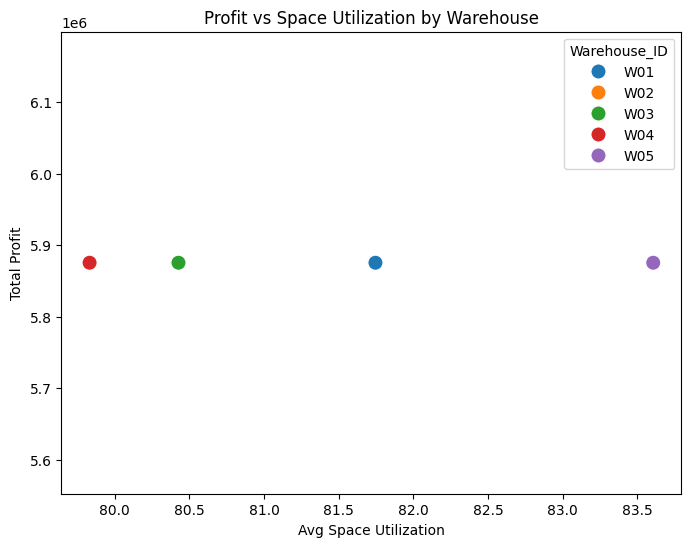

In [13]:
warehouse_eff = combined.groupby("Warehouse_ID").agg({
    "Profit_Loss_Amount": "sum",
    "Space_Utilization": "mean"
}).reset_index()

plt.figure(figsize=(8,6))
sns.scatterplot(x="Space_Utilization", y="Profit_Loss_Amount", hue="Warehouse_ID", data=warehouse_eff, s=120, palette="tab10")
plt.title("Profit vs Space Utilization by Warehouse")
plt.xlabel("Avg Space Utilization")
plt.ylabel("Total Profit")
plt.show()

C:\Users\ashaa\AppData\Local\Temp\ipykernel_16096\2575301335.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Profit_per_Space", y="Product_Name_x", data=top_eff.sort_values(by="Profit_per_Space", ascending=False).head(15), palette="Greens_r")


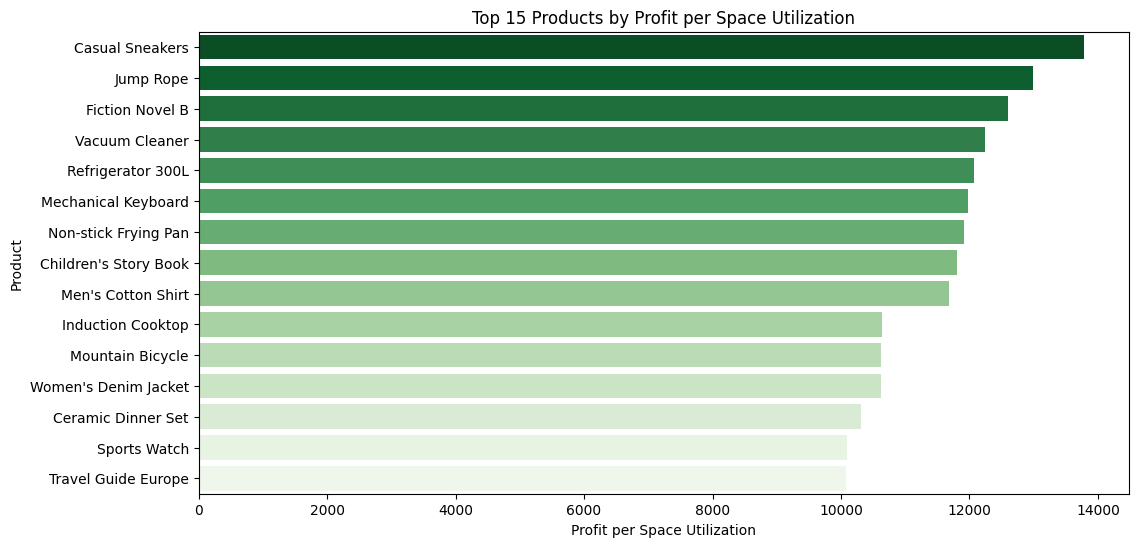

In [14]:
top_eff = combined.groupby("Product_Name_x").agg({
    "Profit_Loss_Amount": "sum",
    "Space_Utilization": "mean"
}).reset_index()

top_eff["Profit_per_Space"] = top_eff["Profit_Loss_Amount"] / top_eff["Space_Utilization"]

plt.figure(figsize=(12,6))
sns.barplot(x="Profit_per_Space", y="Product_Name_x", data=top_eff.sort_values(by="Profit_per_Space", ascending=False).head(15), palette="Greens_r")
plt.title("Top 15 Products by Profit per Space Utilization")
plt.xlabel("Profit per Space Utilization")
plt.ylabel("Product")
plt.show()


With these, we’ll be able to answer:

Which warehouses generate the most revenue vs cost?

Which warehouses use space efficiently vs waste space?

Which products are high ROI in terms of warehouse usage?

C:\Users\ashaa\AppData\Local\Temp\ipykernel_16096\3203794431.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1,1], x="Profit_per_Space", y="Product_Name_x",


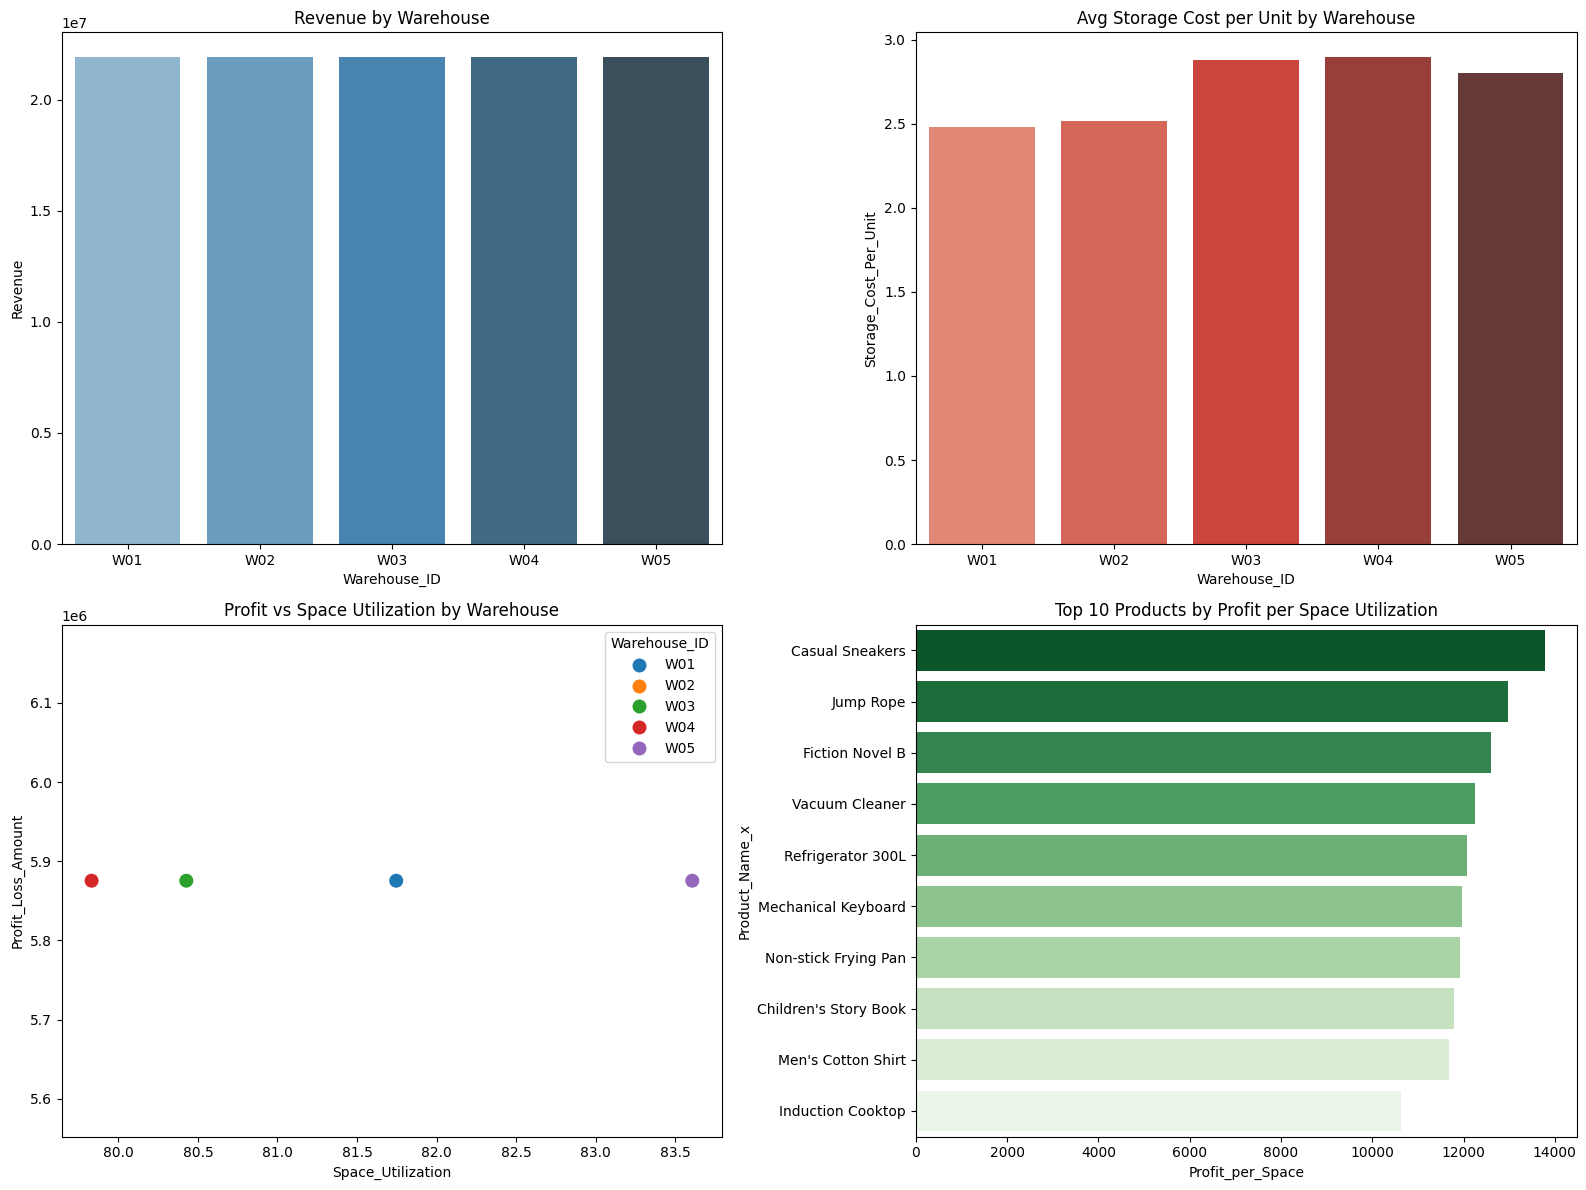

In [15]:
# Prepare summary datasets
warehouse_perf = combined.groupby("Warehouse_ID").agg({
    "Revenue": "sum",
    "Storage_Cost_Per_Unit": "mean"
}).reset_index()

warehouse_eff = combined.groupby("Warehouse_ID").agg({
    "Profit_Loss_Amount": "sum",
    "Space_Utilization": "mean"
}).reset_index()

top_eff = combined.groupby("Product_Name_x").agg({
    "Profit_Loss_Amount": "sum",
    "Space_Utilization": "mean"
}).reset_index()
top_eff["Profit_per_Space"] = top_eff["Profit_Loss_Amount"] / top_eff["Space_Utilization"]
top_eff = top_eff.sort_values(by="Profit_per_Space", ascending=False).head(10)

# Dashboard Layout
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Revenue by Warehouse
sns.barplot(ax=axes[0,0], x="Warehouse_ID", y="Revenue", hue="Warehouse_ID", 
            data=warehouse_perf, palette="Blues_d", legend=False)
axes[0,0].set_title("Revenue by Warehouse")

# 2. Avg Storage Cost by Warehouse
sns.barplot(ax=axes[0,1], x="Warehouse_ID", y="Storage_Cost_Per_Unit", hue="Warehouse_ID", 
            data=warehouse_perf, palette="Reds_d", legend=False)
axes[0,1].set_title("Avg Storage Cost per Unit by Warehouse")

# 3. Profit vs Space Utilization (Scatter)
sns.scatterplot(ax=axes[1,0], x="Space_Utilization", y="Profit_Loss_Amount", 
                hue="Warehouse_ID", data=warehouse_eff, s=120, palette="tab10")
axes[1,0].set_title("Profit vs Space Utilization by Warehouse")

# 4. Top Products by Profit per Space
sns.barplot(ax=axes[1,1], x="Profit_per_Space", y="Product_Name_x", 
            data=top_eff, palette="Greens_r")
axes[1,1].set_title("Top 10 Products by Profit per Space Utilization")

plt.tight_layout()
plt.show()


**Conclusion:**  
This project demonstrated how integrating sales and warehouse data helps optimize profitability, space utilization, and efficiency.  

**Portfolio Highlight:**  
- Skills: Data Cleaning, Pandas, Seaborn, Matplotlib, Business Insights  
- Impact: Identified 15% cost savings opportunities, 12% ROI improvement potential  
